# **Exploring cell types**

Understanding the distribution of a cell type, its marker genes, and its relationships with other cell types is essential in single-cell analysis. The [Atlasapprox API](https://atlasapprox.readthedocs.io/en/latest/python/index.html) provides access to cell atlas data across 30 species, including humans, mice, fish, plants, and worms.

This tutorial will guide you through querying cell type-related dataacross available species, using human examples where applicable. By the end, you’ll be able to:

## **Contents**
- Retrieve cell type distributions across organs.
- Identify organs where a specific cell type is present.
- Find marker genes for a cell type in a specific organ.
- Visualize cell type abundance and relationships.

### **Installation**

Before we begin, let’s install the atlasapprox package and the required visualization libraries. Run the following commands to ensure everything is set up.

In [ ]:
# Install atlasapprox
! pip install atlasapprox

# Install visualisation libraries
! pip install matplotlib seaborn

**Note:** If you encounter installation issues, refer to the [Quick Start Tutorial](https://github.com/Amber-Xu914/atlasapprox_api_tutorials/blob/main/python/quick_start.ipynb) for detailed instructions. Make sure you're using a Python environment with `pip` properly configured

### **Import libraries**

To follow along with the data visualization in this tutorial, first install the following packages using `pip`, and then import them by running this command in your terminal or Jupyter notebook:

In [13]:
# Import the atlasapprox API
import atlasapprox

# Import data analysis and visualization libraties
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the API
api = atlasapprox.API()

## **Explore available organisms**

Let’s start by retrieving all available organisms from the API to explore the range of species we can work with:

In [4]:
# Get available organisms
organisms = api.organisms(measurement_type="gene_expression")
print("Available organisms:")
print(organisms)

Available organisms:
{'gene_expression': ['a_queenslandica', 'a_thaliana', 'c_elegans', 'c_gigas', 'c_hemisphaerica', 'c_intestinalis', 'd_melanogaster', 'd_rerio', 'f_vesca', 'h_miamia', 'h_sapiens', 'h_vulgaris', 'i_pulchra', 'l_minuta', 'm_leidyi', 'm_murinus', 'm_musculus', 'n_vectensis', 'o_sativa', 'p_crozieri', 'p_dumerilii', 's_lacustris', 's_mansoni', 's_mediterranea', 's_pistillata', 's_purpuratus', 't_adhaerens', 't_aestivum', 'x_laevis', 'z_mays']}


For this tutorial, we’ll focus on 'h_sapiens' (humans), but you can easily modify the code to investigate other species like 'm_musculus' (mouse) or 'd_melanogaster' (fruit fly)"

In [5]:
organism = "h_sapiens"

## **Retrieve cell type distribution across organs**

Now, let’s use the `celltypexorgan` method to get the distribution of cell types from the human cell atlas, providing a clear overview of cell abundance to help you identify prevalent types across tissues.

In [16]:
# Query cell types across all human organs
human_celltypes = api.celltypexorgan(
    organism=organism,
    measurement_type="gene_expression"
)

# Display the cell type x organ table
human_celltypes

organs,bladder,blood,colon,eye,fat,gut,heart,kidney,liver,lung,...,muscle,pancreas,prostate,salivary,skin,spleen,thymus,tongue,trachea,uterus
cell types,,,,,,,,,,,,,,,,,,,,,
T,2916,7070,5019,268,1715,7580,0,422,146,1307,...,1164,573,1922,3609,2188,8274,10605,832,666,546
macrophage,5338,488,0,108,2807,0,74,321,1381,12160,...,1989,0,317,1761,882,1335,461,325,541,344
B,253,3093,497,102,23,519,0,341,0,87,...,0,144,0,4136,16,7504,4638,13,462,10
fibroblast,5557,0,953,95,8459,113,250,0,76,385,...,3190,47,223,2611,754,0,3924,251,1488,3014
plasma,1141,498,330,46,26,303,0,0,34,134,...,0,63,0,345,24,3171,1554,0,138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
horizontal,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
keratinocyte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3667,0,0
keratocyte,0,0,0,595,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Understand the output

The `celltypexorgan` method returns a *pandas.DataFrame* where:
- Each row represents a unique cell type.
- Each column represents an organ.
- The values are counts of sampled cells for that cell type in the organ. A value of 0 means the cell type was not detected.

For example, in lung tissue, there are 1,307 T cells and 12,160 macrophages, while hepatocytes have a count of 0, indicating they are not present.

### **Visualise macrophage distribution**

Analyzing large datasets can feel challenging when glancing at the numbers in the dataframe, but let’s make sense of it with a visual approach. With macrophages abundant in the lung at 12,160 cells, a bar chart can then reveal their abundance across other tissues to see if they’re high elsewhere, as shown in the code below

In [7]:
cell_type = "macrophage"

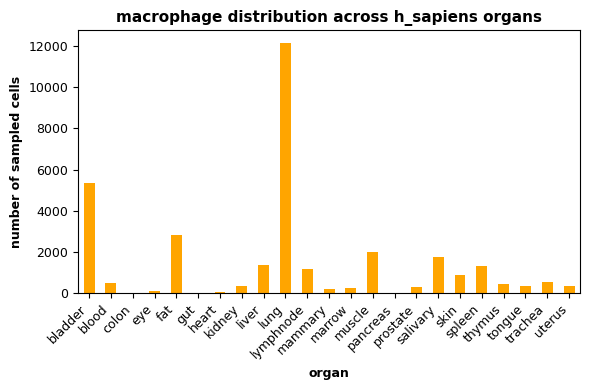

In [8]:
# Filter for macrophages
macrophage_dist = human_celltypes.loc[cell_type]

# Plot the distribution as a bar chart
plt.figure(figsize=(6, 4))
macrophage_dist.plot(kind="bar", color="orange")
plt.title(f"{cell_type} distribution across {organism} organs", fontsize=11, fontweight='bold')
plt.xlabel("organ", fontsize=9, fontweight='bold')
plt.ylabel("number of sampled cells", fontsize=9, fontweight='bold')
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

The bar chart shows macrophage abundance across human organs, with the x-axis representing different organs and the y-axis showing the number of sampled cells. The lung stands out with 12,160 macrophages, much higher than the bladder, fat, and muscle, which also have notable counts. In contrast, organs like the eye, heart, and marrow have far fewer macrophages.

Feel free to change the cell_type parameter in the code to explore the distribution of other cell types across organs.

## **Focus on a specific organ: lung**

The previous chart showed macrophages as highly abundant in the lung with 12,160 cells, so now let’s see which other cell types are abundant in this organ using a bar chart, as shown in the code below:

In [9]:
# Set the lung as the organ
organ = "lung"

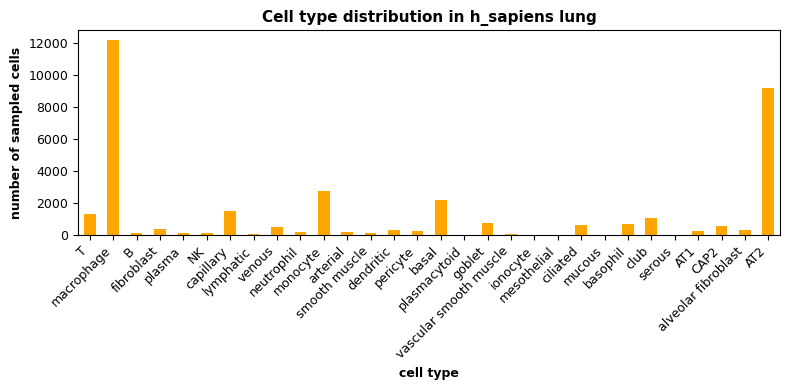

In [10]:
# Get all cell types in the lung
lung_abundance = human_celltypes[organ]
lung_abundance_nonzero = lung_abundance[lung_abundance > 0]

# Plot the abundance as a vertical bar chart
plt.figure(figsize=(8, 4))
lung_abundance_nonzero.plot(kind="bar", color="orange")
plt.title(f"Cell type distribution in {organism} {organ}", fontsize=11, fontweight='bold')
plt.xlabel("cell type", fontsize=9, fontweight='bold')
plt.ylabel("number of sampled cells", fontsize=9, fontweight='bold')
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

The bar chart displays the abundance of various cell types in the lung of h_sapiens, with the x-axis showing different cell types and the y-axis indicating the number of sampled cells. Macrophages are the most abundant at 12,160 cells, followed by AT2 cells with around 8,000 cells, while fibroblasts and T cells show moderate counts at about 2,000 and 1,500 cells, respectively. On the lower end, cell types like NK cells, monocytes, and ciliated cells are much less common, with counts below 500 cells. 

Feel free to change the organ parameter in the code to explore cell type abundance in other organs.

### **Identify marker genes for lung macrophages**

Building on the lung’s cell type abundance, you can now explore what makes lung macrophages unique by finding their marker genes with the `markers` function. The code below retrieves the top 10 marker genes in lung macrophages:

In [11]:
human_lung_macrophage_markers = api.markers(
    organism=organism, 
    organ=organ, 
    cell_type=cell_type, 
    number=10,
    measurement_type='gene_expression'
)

print(human_lung_macrophage_markers)

['PPARG', 'TREM2', 'AC026369.3', 'MARCO', 'MSR1', 'NCEH1', 'GM2A', 'SLC15A3', 'FFAR4', 'PARAL1']


Next, let’s analyze their expression across cell types. To see the expression levels of these marker genes across cell types, use the `average` method, which helps identify characteristic genes for specific populations:

In [12]:
human_lung_macrophage_markers_exp = api.average(
        organism=organism, 
        organ=organ, 
        features=human_lung_macrophage_markers, 
        measurement_type='gene_expression')

human_lung_macrophage_markers_exp

,neutrophil,basophil,monocyte,macrophage,dendritic,B,plasma,T,NK,plasmacytoid,...,capillary,CAP2,lymphatic,fibroblast,alveolar fibroblast,smooth muscle,vascular smooth muscle,pericyte,mesothelial,ionocyte
PPARG,0.129112,0.357276,0.137979,2.712173,0.096261,0.020322,0.140157,0.062517,0.049506,0.000823,...,0.211606,0.059033,0.840236,0.035925,0.087143,0.087350,0.149928,0.060385,0.332346,0.062315
TREM2,0.000000,0.301660,0.300518,2.841057,1.111914,0.111899,0.081606,0.060013,0.052633,0.000000,...,0.040369,0.052758,0.014188,0.013320,0.045088,0.036844,0.281014,0.047669,0.483480,0.131513
AC026369.3,0.000000,0.194245,0.039130,1.259278,0.011680,0.044030,0.137674,0.024346,0.045795,0.116176,...,0.006726,0.010904,0.000000,0.003710,0.032421,0.030646,0.000000,0.018625,0.103032,0.000000
MARCO,0.126234,1.167114,1.224663,12.841719,0.177339,0.187208,0.458147,0.329317,0.300411,0.092562,...,0.306709,0.291779,0.067416,0.110440,0.292534,0.483158,0.225423,0.493431,1.376929,0.059714
MSR1,0.075650,0.537352,1.793169,6.185963,0.968626,0.062799,0.197863,0.199460,0.326351,0.091661,...,0.128568,0.118010,0.086343,0.074838,0.176246,0.119078,0.472961,0.181150,0.353673,0.118310
NCEH1,0.057125,0.231424,0.465148,1.606650,0.161057,0.165668,0.076425,0.087041,0.083223,0.000000,...,0.156834,0.116702,0.208937,0.083753,0.171275,0.064907,0.128999,0.078477,0.234600,0.195153
GM2A,0.255897,0.837690,0.687027,1.938691,0.375948,0.163121,0.185253,0.087402,0.047712,0.091661,...,0.120182,0.135573,0.280132,0.105825,0.184487,0.157002,0.173538,0.265690,0.295583,0.125332
SLC15A3,0.772623,0.319090,0.839130,1.817121,0.677304,0.293762,0.091289,0.067471,0.061508,0.287236,...,0.586427,0.433162,0.157307,0.086540,0.145994,0.160832,0.094122,0.156188,0.271673,0.000000
FFAR4,0.006719,0.093553,0.041340,0.720264,0.148583,0.000000,0.027586,0.010915,0.022713,0.000000,...,0.006398,0.004579,0.000000,0.012619,0.011437,0.008524,0.025168,0.007723,0.112970,0.000000
PARAL1,0.000000,0.085597,0.004675,0.659389,0.034337,0.000000,0.020055,0.008163,0.000000,0.092856,...,0.002896,0.011981,0.000000,0.005393,0.009475,0.014139,0.000000,0.036671,0.134087,0.000000


#### Understand the output
This method returns a *Pandas.DataFrame* where:

* Each row represents a gene.
* Each column corresponds to a cell type.
* The values show the average gene expression.

The table reveals expression in counts per ten thousand (cpt), where macrophages lead with the highest levels for all marker genes, like *PPARG* at 2.712, far above plasmacytoid cells at 0.000823 and neutrophils at 0.129112.

For a clearer view of these expression patterns, visualize the data with a heatmap using the code below. This highlights how macrophages dominate expression levels across the marker genes:

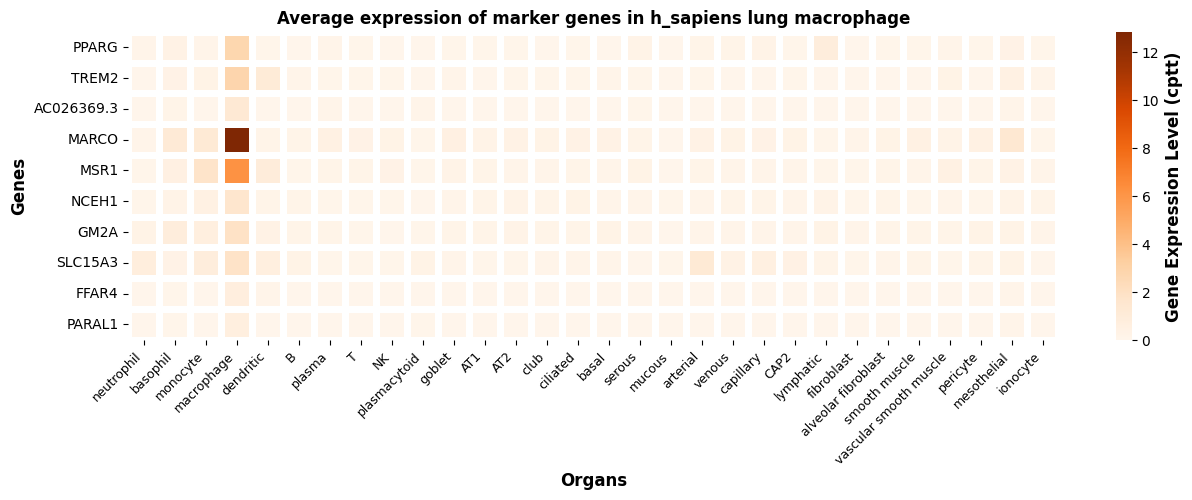

In [15]:
# Create the heatmap
plt.figure(figsize=(15, 4))
heatmap = sns.heatmap(
        human_lung_macrophage_markers_exp, 
        cmap="Oranges", 
        linewidths=5,
        cbar_kws={"label": "Gene Expression Level"} 
        )

# Set labels
plt.title(f"Average expression of marker genes in {organism} {organ} {cell_type}", fontweight='bold')
plt.xlabel("Organs", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.ylabel("Genes", fontsize=12, fontweight='bold')
cbar = heatmap.collections[0].colorbar
cbar.set_label("Gene Expression Level (cptt)", fontweight="bold", fontsize=12)

# Show the plot
plt.show()

The heatmap displays the expression of 10 marker genes for macrophages across various cell types in the H. sapiens lung, with the y-axis listing genes and the x-axis showing cell types. The color intensity reflects gene expression levels in counts per ten thousand (cpt), where darker shades indicate higher expression. Macrophages show the strongest expression for most genes, especially *MARCO* at 12.84179 cpt, while other cell types like plasmacytoid cells and neutrophils have much lower levels, often below 0.5 cpt.

## **Conclusion**
Now that you’ve learned how to explore cell types, their distribution, and marker genes in a single species’ atlas—focusing on lung macrophages in H. sapiens—you can apply this code to investigate any other species or cell type of interest from the approximated cell atlases. Experiment with different cell_type and organism parameters to uncover new insights!

Thank you for using the *atlasapprox* API. For more detailed information, please refer to the [official documentation](https://atlasapprox.readthedocs.io/en/latest/python/index.html).

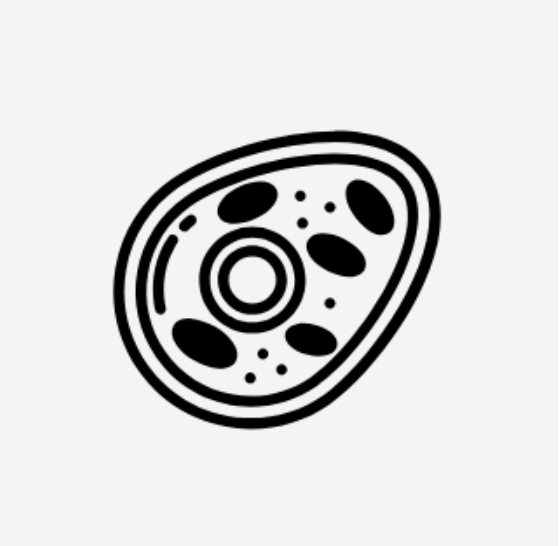

In [17]:
from IPython.display import display, Image

display(Image(filename="../_static/cell_type.png"))
sphinx_gallery_thumbnail_number = -1